First I will import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Then now I will import the data

In [2]:
df= pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
pd.set_option('display.max_rows', df.shape[0]+1) #so I can see all the rows in the dataframe
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


I want to see the shape of the dataframe

In [3]:
df.shape 

(301, 8)

It seems I have 301 entries and 8 features/columns. I also want to check if I have missing values and where these are.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


It seems that the Previous year rank column has the only one with missing values

It has 24 missing values.

In [5]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

Let's see what are the values there

In [6]:
df['Previous Year Rank'].unique()

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', 'not ranked',
       '38', '2', '15', '14', '26', 'none', '18', '>10', '>20', '?', '24',
       '21', '>14', '>100', '??'], dtype=object)

It seems that there are values such as 'not ranked', 'none', '?', or '??' in this column, but pandas does not see this as NaN. So I will manually convert these ones to NaN to get an accurate number of missing values.

In [7]:
df.replace({'Previous Year Rank' : {'not ranked':np.nan, 'none':np.nan, '?':np.nan, '??':np.nan}}, inplace = True)

In [8]:
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [9]:
df['Previous Year Rank'].unique() #no more none or ? or ?? in this data set. All missing values are now nan.

array([nan, '8', '1', '>30', '4', '5', '12', '6', '3', '9', '17', '13',
       '10', '>40', '19', '40', '7', '11', '30', '22', '20', '38', '2',
       '15', '14', '26', '18', '>10', '>20', '24', '21', '>14', '>100'],
      dtype=object)

Now that the missing values are cleaned up, I can see that there is a total of 34 missing values. That is 11% of total data.

In [10]:
df.isnull().sum() 

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      34
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

I just wanted to see if there is a general trend in those missing values, just to be sure it isnt MAR or MNAR

I could not see a pattern on the missing values (in relation to other columns), so I think this is MCAR. 

In [11]:
df[df['Previous Year Rank'].isna()]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


I think it is better to drop this column altogether. Although the missing values comprise just 11% of the total data, I think this Previous Year Rank does not help much with the analysis and can be dropped. It also would not be reasonable to impute this with mean values, because that would not be accurate for this data set. Some of these athletes do not have previous records at all, so imputing with mean will skew the data. 

In [12]:
df.drop('Previous Year Rank', axis = 1, inplace = True)

In [13]:
df

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,boxing,1990,28.6
1,2,Buster Douglas,USA,2,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,auto racing,1990,10.0
4,5,Alain Prost,France,5,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,golf,1990,8.6
6,7,Greg Norman,Australia,7,golf,1990,8.5
7,8,Michael Jordan,USA,8,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,golf,1990,8.1
9,10,Evander Holyfield,USA,8,boxing,1990,8.1


Now I only have 7 columns, with no missing data. I can start visualizing it.

In [14]:
df.shape

(301, 7)

In [15]:
df.isnull().sum()

S.NO                    0
Name                    0
Nationality             0
Current Rank            0
Sport                   0
Year                    0
earnings ($ million)    0
dtype: int64

First I want to see which nationalities have the most number of richest athletes.

<AxesSubplot:>

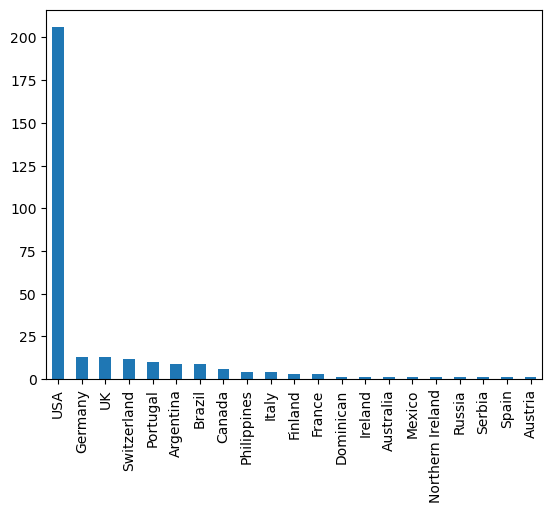

In [28]:
df['Nationality'].sort_values().value_counts().plot(kind= 'bar')

I observed a couple of things quite easily using this bar graph.
First, I can see that USA leads as the country with most richest athletes, by a huge margin. 
Second, I notice that Philippines and Filipino are the same country and Nationality, but these are categorized differently. I'll change that.

In [17]:
df.replace('Filipino', 'Philippines', inplace = True)

<AxesSubplot:>

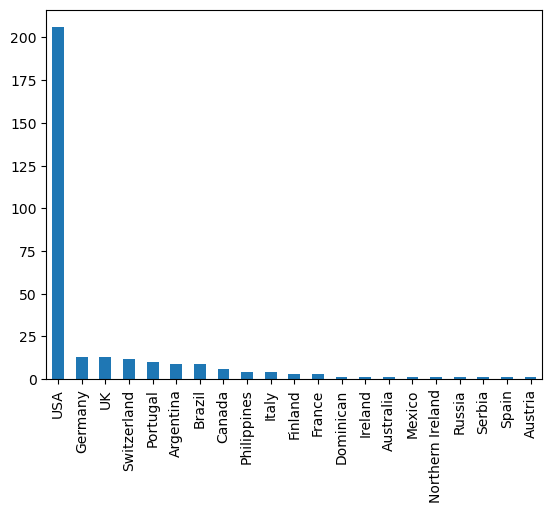

In [18]:
df['Nationality'].sort_values().value_counts().plot(kind= 'bar')

That cleaned the data up a bit. Now Philippines and Filipino are considered one and the same.

I was curious which sports do these richest athletes play. For that I made a bar graph.

<AxesSubplot:>

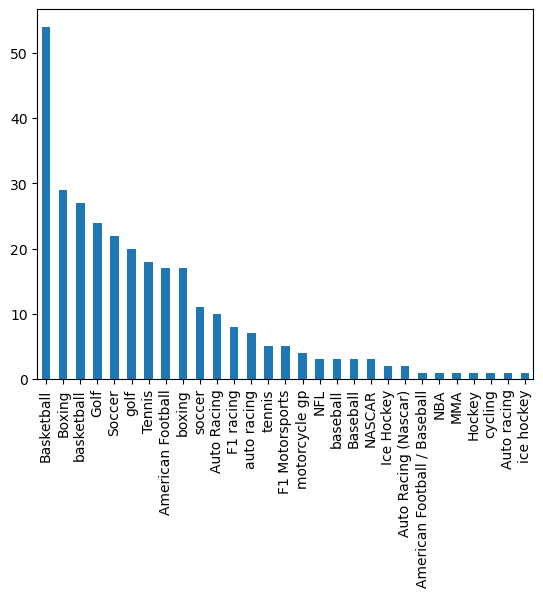

In [19]:
df['Sport'].sort_values().value_counts().plot(kind= 'bar') #so many repeated values - i will clean them up

Again, I could see that there are many repetitive names. Some are just lowercase letters, for example 'Basketball' and 'basketball' but they're saved in two different categories. I cleaned up this data by merging them together.

I also had to merge together several different names of the same sport, for example, NBA is also Basketball, F1 racing is also auto racing, and so on.

In [20]:
df.replace({'Sport' : {'MMA':'Boxing', 'basketball' : 'Basketball', 'golf' : 'Golf', 'auto racing' : 'Auto Racing', 'boxing':'Boxing', 'soccer':'Soccer', 'baseball':'Baseball','Auto racing':'Auto Racing', 'NASCAR': 'Auto Racing', 'Auto Racing (Nascar)': 'Auto Racing', 'F1 Motorsports': 'Auto Racing', 'F1 racing': 'Auto Racing','NFL': 'American Football', 'NBA': 'Basketball', 'tennis':'Tennis', 'ice hockey':'Ice Hockey'}}, inplace = True)

After cleaning that up I create a bar graph to visualize the Sports with the highest number of high earning athletes. 

<AxesSubplot:>

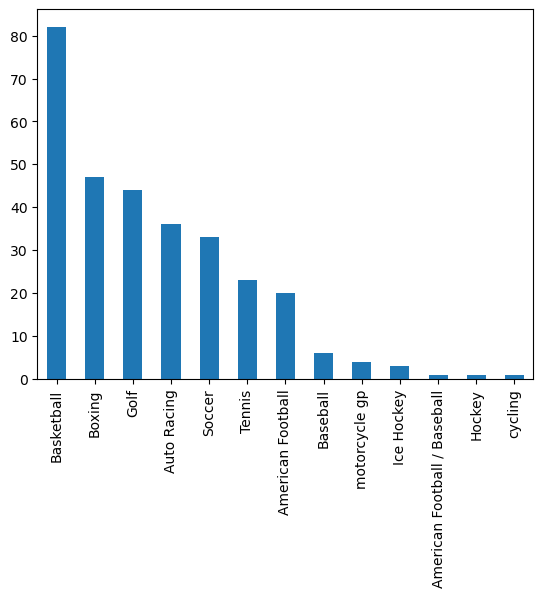

In [21]:
df['Sport'].sort_values().value_counts().plot(kind= 'bar') #sports with the highest amount of high earners

Basketball comes out on the top, then boxing, and then golf. As Basketball comes out on the top, it makes sense to me why this is so. Basketball is very popular in the US, and this very much correlates with why US is the Nationality with most of the richest athletes (correlates with the previous graph).

In [43]:
df[df['Sport']=='Auto Racing'].head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
3,4,Ayrton Senna,Brazil,4,Auto Racing,1990,10.0
4,5,Alain Prost,France,5,Auto Racing,1990,9.0
14,15,Ayrton Senna,Brazil,5,Auto Racing,1991,13.0
15,16,Alain Prost,France,6,Auto Racing,1991,11.0
18,19,Nigel Mansell,UK,9,Auto Racing,1991,9.0


In [44]:
df[df['Sport']=='Boxing'].head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,Boxing,1990,28.6
1,2,Buster Douglas,USA,2,Boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,Boxing,1990,13.0
9,10,Evander Holyfield,USA,8,Boxing,1990,8.1
10,11,Evander Holyfield,USA,1,Boxing,1991,60.5


In [45]:
df[df['Sport']=='Basketball'].head()

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
7,8,Michael Jordan,USA,8,Basketball,1990,8.1
12,13,Michael Jordan,USA,3,Basketball,1991,16.0
20,21,Michael Jordan,USA,1,Basketball,1992,35.9
30,31,Michael Jordan,USA,1,Basketball,1993,36.0
35,36,Shaquille O'Neal,USA,6,Basketball,1993,15.2


I would like to know who are the top 10 athletes with the highest earnings, so I filter and sort by earnings.

In [22]:
sorted_by_earning = df.sort_values(by=['earnings ($ million)'], ascending=False)

In [23]:
sorted_by_earning.head(10)

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,Boxing,2015,300.0
271,272,Floyd Mayweather,USA,1,Boxing,2018,285.0
242,243,Manny Pacquiao,Philippines,2,Boxing,2015,160.0
281,282,Lionel Messi,Argentina,1,Soccer,2019,127.0
171,172,Tiger Woods,USA,1,Golf,2008,115.0
272,273,Lionel Messi,Argentina,2,Soccer,2018,111.0
181,182,Tiger Woods,USA,1,Golf,2009,110.0
282,283,Cristiano Ronaldo,Portugal,2,Soccer,2019,109.0
273,274,Cristiano Ronaldo,Portugal,3,Soccer,2018,108.0
291,292,Roger Federer,Switzerland,1,Tennis,2020,106.3


From this I notice two things:
1. Floyd Mayweather earned so much. He was a top earner in 2015 and 2018. Then Manny Pacquaio. Boxing athletes seem to earn a lot. Because of this, I am curious to see who is the richest athlete among all these top richest athletes.
2. The years of the top 10 largest earnings are only the more recent years and not the earlier years. Could this mean that as the years go, the higher the athletes get paid?


In [52]:
sorted_by_earning.tail(10)

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
18,19,Nigel Mansell,UK,9,Auto Racing,1991,9.0
4,5,Alain Prost,France,5,Auto Racing,1990,9.0
28,29,Jim Courier,USA,9,Tennis,1992,9.0
5,6,Jack Nicklaus,USA,6,Golf,1990,8.6
6,7,Greg Norman,Australia,7,Golf,1990,8.5
19,20,Sugar Ray Leonard,USA,10,Golf,1991,8.5
29,30,Monica Seles,USA,10,Tennis,1992,8.5
9,10,Evander Holyfield,USA,8,Boxing,1990,8.1
8,9,Arnold Palmer,USA,8,Golf,1990,8.1
7,8,Michael Jordan,USA,8,Basketball,1990,8.1


In contrast, the bottom 10 earnings were all in the years 1990. This means that their payments seems to reflect inflation over time. 

Before I see the richest athletes among all these top richest athletes, I want to see how often they have been the top earning during this period 1990 to 2020. I therefore will make a countplot where the number of times their name appears on the dataframe.

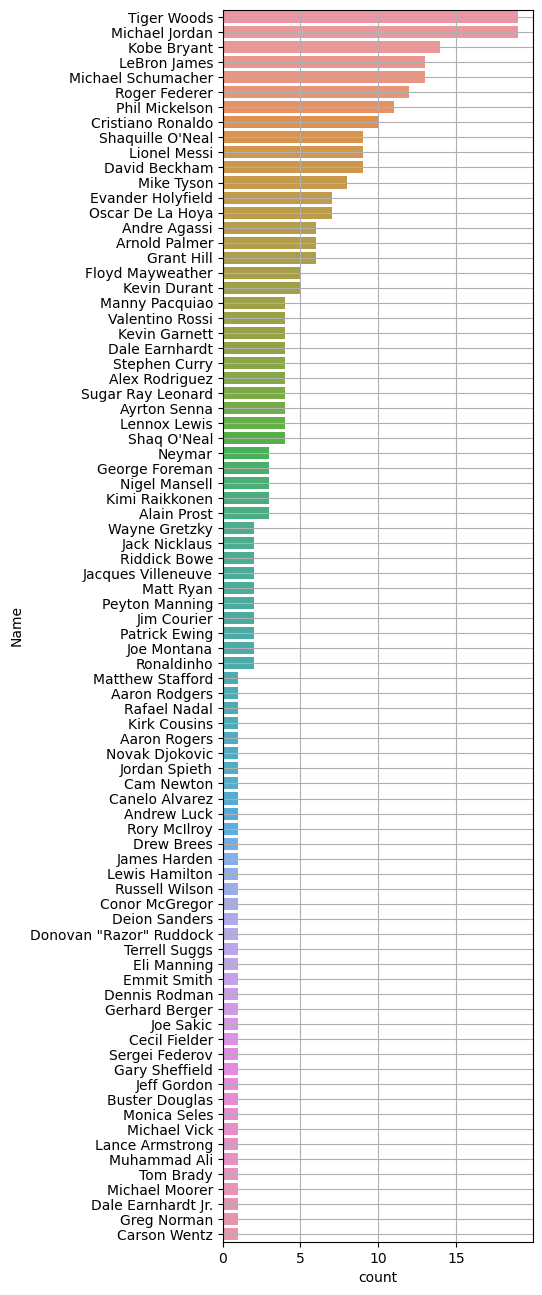

In [51]:
plt.figure(figsize=(4,16))
sns.countplot(y = 'Name', data = df, order = df['Name'].value_counts().index)
plt.grid()

Tiger Woods and Michael Jordan seems to have graced this table most number of times.

Going back to my first observation, I grouped by Name and summed up the total earnings of each person and sorted the sum by values. I then plotted this onto a bar graph. Because Tiger Woods came up so many times on the table, I guess he earned way more than other athletes. He was then followed by Lebron James and Floyd Mayweather. 

<AxesSubplot:ylabel='Name'>

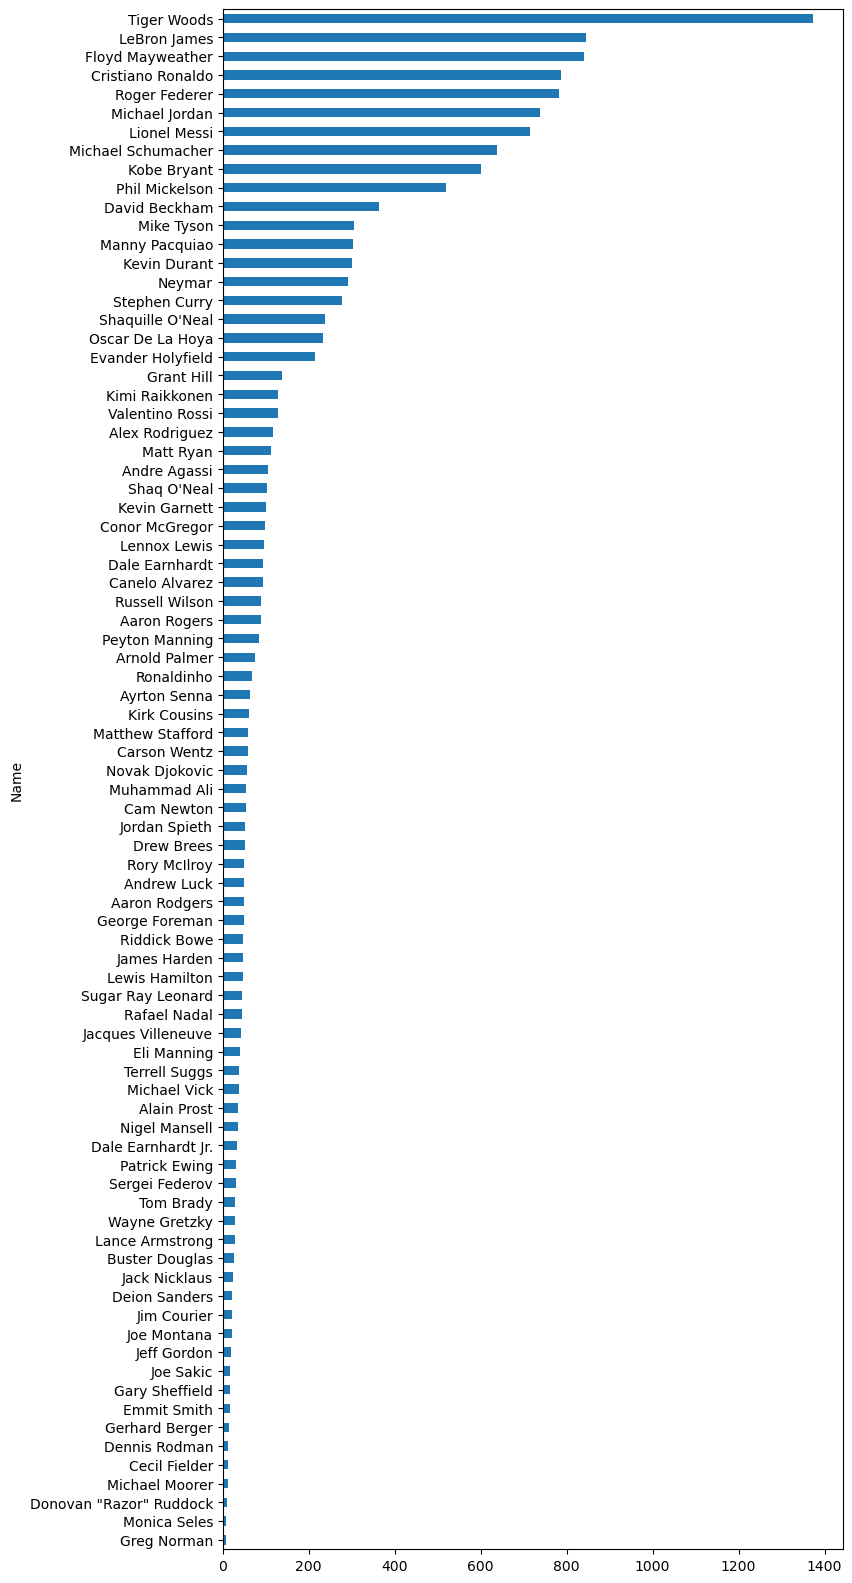

In [25]:
plt.figure(figsize = (8, 20))
df.groupby(by = 'Name')['earnings ($ million)'].sum().sort_values(ascending = True).plot(kind='barh')

For my second observation, I wanted to visualize how the earnings changed over the years. It seems there is an upward trend from 1990 up to 2020. The median increasing over time, meaning athletes get paid more in the recent times. This supports the idea that payments seems to reflect inflation over time.

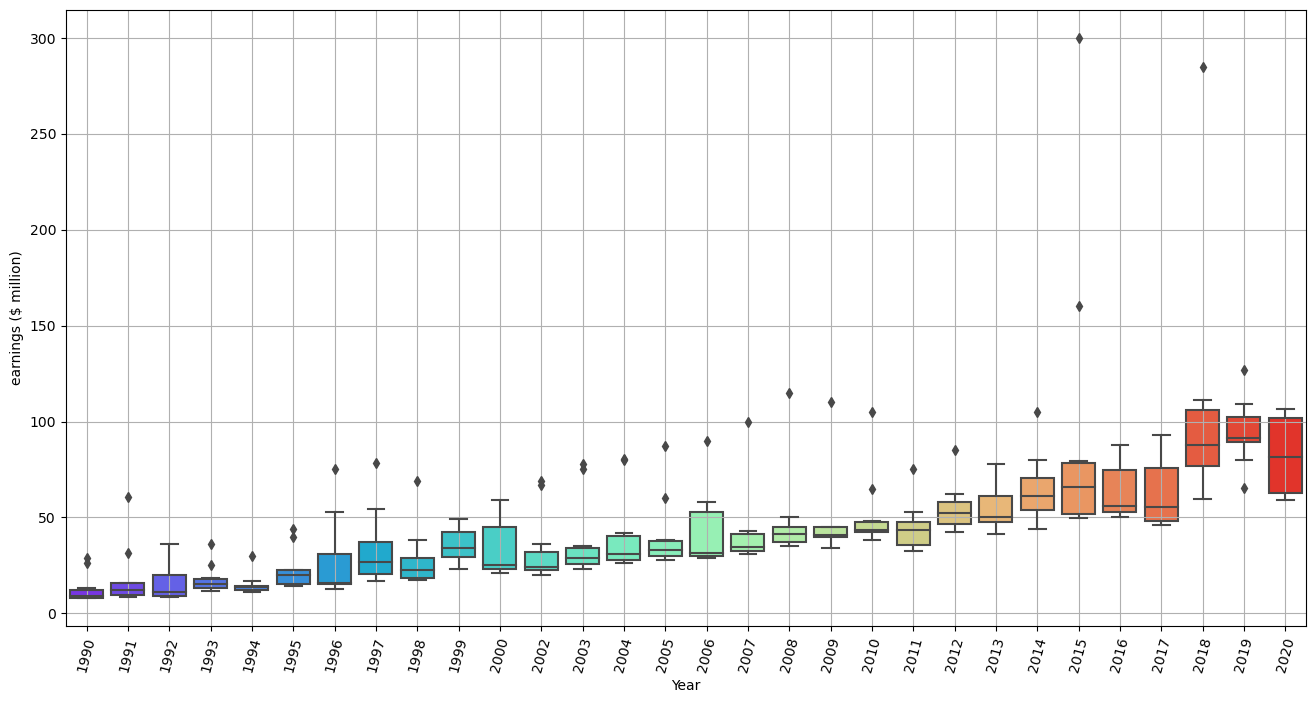

In [26]:
plt.figure(figsize = (16,8))
sns.boxplot(x='Year',y='earnings ($ million)', data=df, palette='rainbow')
plt.xticks(rotation = 75)
plt.grid()